In [ ]:
# CNN Fully Connected Network From Scratch
# Fully Connected Dense Network


In [1]:
# !pip install tensorflow

In [2]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# keras API documentation:
# https://www.tensorflow.org/api_docs/python/tf/keras
from tensorflow.keras import datasets # https://www.tensorflow.org/api_docs/python/tf/keras/datasets
from tensorflow.keras import layers # https://www.tensorflow.org/api_docs/python/tf/keras/layers
from tensorflow.keras import activations # https://www.tensorflow.org/api_docs/python/tf/keras/activations
from tensorflow.keras import initializers # https://www.tensorflow.org/api_docs/python/tf/keras/initializers
from tensorflow.keras import losses # https://www.tensorflow.org/api_docs/python/tf/keras/losses
from tensorflow.keras import metrics # https://www.tensorflow.org/api_docs/python/tf/keras/metrics
from tensorflow.keras import optimizers # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras import regularizers # https://www.tensorflow.org/api_docs/python/tf/keras/regularizers
from tensorflow.keras.optimizers import schedules # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules
from tensorflow.keras import callbacks # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
from tensorflow.keras import utils # https://www.tensorflow.org/api_docs/python/tf/keras/utils
from tensorflow.keras import models # https://www.tensorflow.org/api_docs/python/tf/keras/models

In [3]:

# load the MNIST dataset
# - contains 70,000 grayscale images (handwritten digits)
# - images are low resolution (28 by 28 pixels)
# - 10 categories (labeled 0 through 9)
# - 60,000 images in train and 10,000 images in test

mnist = datasets.mnist

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = 10

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

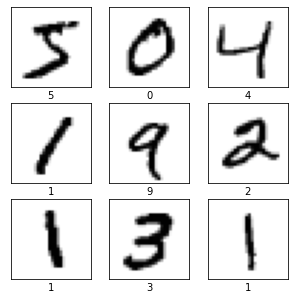

In [4]:

# view a sample of 9 images from the training set
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:

# CREATE model 
# a sequential model is appropriate for a plain stack of layers where each layer 
# has exactly one input tensor and one output tensor.
model = tf.keras.Sequential([
    
    # tell keras the input shape is (28, 28, 1); 
    # sample size is ommitted - only the shape of each sample is specified 
    tf.keras.Input(shape=(28, 28, 1)), 

    # preprocess images to lie in the range 0-1
    layers.experimental.preprocessing.Rescaling(1.0 / 255), 
    
    # Flatten the 2D (28 x 28 x 1) images to be 1D (28 * 28 * 1 = 784)
    layers.Flatten(), 
    
    # create Dense hidden layer 1 with 256 nodes (leave everything else at default values),
    # followed by BatchNormalization (leave everything at default values),
    # followed by ReLU Activation (leave everything else at default values)
    layers.Dense(units=256),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),

    # create Dense hidden layer 2 with 128 nodes (leave everything else at default values),
    # followed by BatchNormalization (leave everything at default values),
    # followed by ReLU Activation (leave everything else at default values)
    layers.Dense(units=128),
    layers.BatchNormalization(),
    layers.Activation(activations.relu),
    
    # create Dense output layer with 10 nodes and Softmax activation (leave everything else at default values)
    layers.Dense(units=10, activation=activations.softmax)
    
])

# DISPLAY model architecture
model.summary()

# COMPILE model
model.compile(
    
    # use Adam optimizer with learning rate 0.001 (leave everything else at default values)
    optimizer=optimizers.Adam(learning_rate=0.001),
    
    # use SparseCategoricalCrossentropy loss (leave everything at default values)
    loss=losses.SparseCategoricalCrossentropy(),
    
    # track accuracy metric
    metrics=['accuracy']
    
) 

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                          

2022-04-13 15:19:54.165864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-13 15:19:54.165967: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
%%time

# TRAIN model 
history = model.fit(
    
    # training set images
    train_images, 
    
    # training set labels
    train_labels, 
    
    # number of epochs to train
    epochs=15,
    
    # mini-batch SGD batch size
    # if None, defaults to 32
    batch_size=128,
    
    # validation set - can use validation_split or validation_data
    validation_split=0.1,
) 

Epoch 1/15


2022-04-13 15:19:54.276015: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/422 [..............................] - ETA: 3:00 - loss: 2.6947 - accuracy: 0.0859

2022-04-13 15:19:54.514425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 0.2371 - accuracy: 0.9326

2022-04-13 15:19:58.138985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 4s 9ms/step - loss: 0.2371 - accuracy: 0.9326 - val_loss: 0.1102 - val_accuracy: 0.9680
Epoch 2/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0849 - accuracy: 0.9751 - val_loss: 0.0785 - val_accuracy: 0.9748
Epoch 3/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0522 - accuracy: 0.9843 - val_loss: 0.0742 - val_accuracy: 0.9772
Epoch 4/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.0788 - val_accuracy: 0.9753
Epoch 5/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0660 - val_accuracy: 0.9797
Epoch 6/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.0791 - val_accuracy: 0.9777
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0812 - val_accuracy: 0.9797
Epoch 8/15
422/42

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


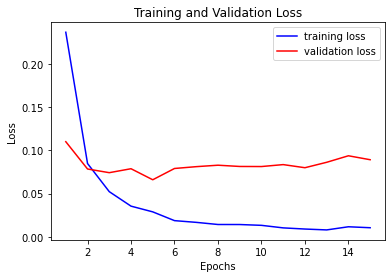

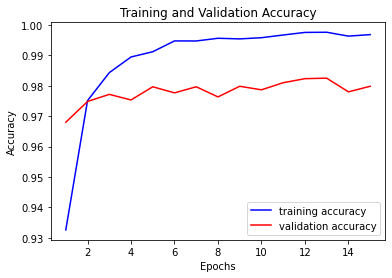

In [7]:

# PLOT loss and accuracy for train and validation data

# model.fit() returns a History object that contains a dictionary with everything that happened during training
# we can use it to plot training/validation loss and training/validation accuracy
history_dict = history.history
print (history_dict.keys())

# plot loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
# EVALUATE model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print ("\ntest set loss: ", round(test_loss,4), "\ntest set accuracy: ", round(test_acc,4))

313/313 - 1s - loss: 0.0842 - accuracy: 0.9794 - 1s/epoch - 4ms/step

test set loss:  0.0842 
test set accuracy:  0.9794


In [13]:
##### THIS IS CELL 2 (of 2) YOU WILL EDIT PER THE ISNTRUCTIONS BELOW

# CREATE model 
# a sequential model is appropriate for a plain stack of layers where each layer 
# has exactly one input tensor and one output tensor.
model = tf.keras.Sequential([
    
    # tell keras the input shape is (28, 28, 1); 
    # sample size is ommitted - only the shape of each sample is specified 
    tf.keras.Input(shape=(28, 28, 1)), 

    # preprocess images to lie in the range 0-1
    layers.experimental.preprocessing.Rescaling(1.0 / 255), 
    
    # create 2 pairs of convolutional-pooling layers as below (leave everything else at default values)
    #  - Conv2D: 32 filters, kernel size (3,3), strides (1,1), valid padding, relu activation
    #  - MaxPool2D: pool size (2,2), strides (2,2)
    #  - Conv2D: 64 filters, kernel size (3,3), strides (1,1), valid padding, relu activation
    #  - MaxPool2D: pool size (2,2), strides (2,2)
    ### (2.1) YOUR CODE HERE
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    
    # Flatten to get output ready for fully connected layer (leave everything at default values)
    ### (2.2) YOUR CODE HERE
    layers.Flatten(), 
    
    # use Dropout with drop rate of 0.5 (leave everything else at default values)
    ### (2.3) YOUR CODE HERE
    layers.Dropout(0.5),
    
    # create Dense output layer with 10 nodes and Softmax activation (leave everything else at default values)
    ### (2.4) YOUR CODE HERE
    layers.Dense(units=10, activation='softmax')

])

# DISPLAY model architecture
# you should end up with total parameters 34,826  
# ensure you understand the number of parameters in each layer, 
# as well as total number of trainable and non-trainable parameters
model.summary()

# COMPILE model
model.compile(
    
    # use Adam optimizer with learning rate 0.001 (leave everything else at default values)
    ### (2.5) YOUR CODE HERE
    optimizer=optimizers.Adam(learning_rate=0.001),
    
    # use SparseCategoricalCrossentropy loss (leave everything at default values)
    ### (2.6) YOUR CODE HERE
    loss=losses.SparseCategoricalCrossentropy(),
    
    # track accuracy metric
    ### (2.7) YOUR CODE HERE
    metrics=['accuracy']

) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

In [ ]:
# CNN

In [14]:
%%time

# TRAIN model 
# ensure you can explain the number of gradient descent steps in each epoch
history = model.fit(
    
    # training set images
    train_images, 
    
    # training set labels
    train_labels, 
    
    # number of epochs to train
    epochs=15,
    
    # mini-batch SGD batch size
    # if None, defaults to 32
    batch_size=128,
    
    # validation set - can use validation_split or validation_data
    validation_split=0.1,
) 

Epoch 1/15
  4/422 [..............................] - ETA: 8s - loss: 2.2623 - accuracy: 0.1504  

2022-04-13 15:22:35.847361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 0.3506 - accuracy: 0.8951

2022-04-13 15:22:41.283052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 6s 14ms/step - loss: 0.3506 - accuracy: 0.8951 - val_loss: 0.0814 - val_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 6s 13ms/step - loss: 0.1039 - accuracy: 0.9678 - val_loss: 0.0551 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0800 - accuracy: 0.9753 - val_loss: 0.0482 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0653 - accuracy: 0.9796 - val_loss: 0.0452 - val_accuracy: 0.9868
Epoch 5/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0610 - accuracy: 0.9816 - val_loss: 0.0400 - val_accuracy: 0.9883
Epoch 6/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0361 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 6s 13ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0352 - val_accuracy: 0.9900
Epoch 8/15

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


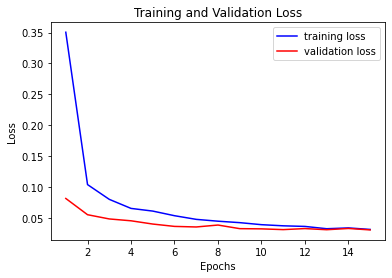

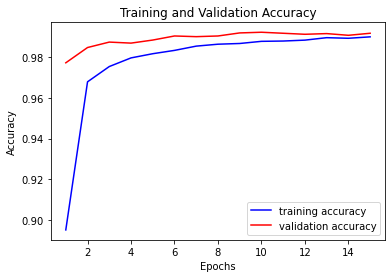

In [15]:

# PLOT loss and accuracy for train and validation data

# model.fit() returns a History object that contains a dictionary with everything that happened during training
# we can use it to plot training/validation loss and training/validation accuracy
history_dict = history.history
print (history_dict.keys())

# plot loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# EVALUATE model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print ("\ntest set loss: ", round(test_loss,4), "\ntest set accuracy: ", round(test_acc,4))

313/313 - 1s - loss: 0.0247 - accuracy: 0.9917 - 1s/epoch - 4ms/step

test set loss:  0.0247 
test set accuracy:  0.9917
